# 1. Bag of word

1. 특정한 순서가 없는 토큰화 방법: 문장 구조가 사라진다.
2. 딥러닝 모델보다 얕은 학습 방법(랜덤 포레스트, 로지스틱 회귀) 언어 처리 모델에 사용한다.
3. N-gram을 추출하는 것은 일종의 특성 공학이다. 딥러닝은 유연하지 못하고 불안정한 이런 방식을 계층적인 특성 학습으로 대체한다. 이 방식들은 그룹들을 명시적으로 알려주지 않아도 연속된 단어나 문자의 시퀀스를 본다.

## 1. One-hot Encoding

### word-level

In [3]:
import numpy as np

samples = ['The cat sat on the mat.',
           'The dog ate my homework.']
token_index = {}

for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1 # allocate index 

- 관례상 인덱스 0은 단어가 아닌 토큰을 위해서 남겨둔다.

In [4]:
max_length = 10 # 각 샘플에서 max_length 단어까지만 사용한다.
results = np.zeros(shape=(len(samples), 
                          max_length, 
                          max(token_index.values()) + 1))

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j ,index] = 1.

In [5]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

### 문자 수준 원핫 인코딩

In [8]:
import string

samples = ['The cat sat on the mat.',
           'The dog ate my homework.']
characters = string.printable
token_index = dict(zip(characters, range(1, len(characters) + 1)))

In [12]:
max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.

In [28]:
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

### 케라스에 있는 단어 수준의 원핫 인코딩

In [16]:
from keras.preprocessing.text import Tokenizer

In [27]:
samples = ['The cat sat on the mat', 
           'The dog ate my homework']

# 빈도가 높은 1000개만 사용
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples) # 정수 인덱스 변환
sequences[:5]

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [26]:
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
one_hot_results[:5]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [25]:
word_index = tokenizer.word_index
word_index

{'the': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'mat': 5,
 'dog': 6,
 'ate': 7,
 'my': 8,
 'homework': 9}

### 원핫 해싱(one-hot hashing)

- 주요 장점은 명시적인 인덱스가 필요 없기 때문에 메모리를 절약하고 온라인 방식으로 데이터를 인코딩할 수 있다.
- 한 가지 단점은 해싱 충돌입니다. 2개 단어가 같은 해시를 만들면 이를 바라보는 머신러닝 모델은 단어 사이 차이를 인식하지 못합니다.
- 해싱 공간의 차원이 해싱될 고유 토큰의 전체 개수보다 훨씬 크면 해시 충돌의 가능성은 감소합니다.

In [29]:
samples = ['The cat sat on the mat.', 
           'The dot ate my homework.']
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

In [32]:
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

## 2. 단어 임베딩 사용하기

- 원핫 인코딩이나 해싱으로 얻은 단어 표현은 희소하고 고차원이다.
- 단어 임베딩은 조밀하고 비교적 저차원이며 데이터로부터 학습된다.

1) (문서 분류나 감성 예측 같은) 관심 대상 문제와 함께 단어 임베딩을 학습한다. 이런 경우에는 랜덤한 단어 벡터로 시작해서 신경망의 가중치를 학습하는 것과 같은 방식으로 단어를 학습한다.

2) 풀려는 문제가 아니고 다른 머신러닝 작업에서 미리 계산된 임베딩을 로드한다. 이를 사전 훈련된 임베딩이라 한다.

### 1) Embedding 층을 사용하여 단어 임베딩 학습하기

- 단어와 밀집 벡터를 연관 짓는 가장 간단한 방법은 랜덤하게 백터를 선택하는 것이다.

- 단어 임베딩은 언어를 기하학적 공간에 매핑하는 것이다. 예를 들어 잘 구축된 임베딩 공간에서는 동의어가 비슷한 단어 벡터로 인베딩 될 것이다. 일반적으로 두 단에 벡터 사이의 거리는 이 단어 사이의 의미 거리와 관계되어 있다.

- 새로운 작업에는 새로운 임베딩을 학습하는 것이 타당하다. 다행히 역전파를 사용하여 쉽게 만들 수 있고 케라스를 사용하면 더 쉽다.

In [34]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64) # Embedding 층은 적어도 2개의 매개변수를 받는다. 가능한 토큰의 개수(1000)와 임베딩 차원(64)입니다.

- Embedding 층을 정수 인덱스를 밀집 벡터로 매핑하는 딕셔너리로 이해하는 것이 가장 좋습니다. 정수를 입력으로 받아 내부 딕셔너리에 이 정수에 연관된 벡터를 찾아 반환합니다. 딕셔너리 탐색은 효율적으로 수행됩니다.

### 단어 인덱스 -> Embedding -> 연관된 단어 벡터

- Embedding 층은 크기가 (samples, sequence_length)인 2D 정수 텐서를 입력으로 받습니다. 각 샘플은 정수 시퀀스입니다. 가변 길이의 시퀀스를 임베딩할 수 있습니다. 작은 길이의 시퀀스는 0으로 패딩되고 길이가 더 긴 시퀀스는 잘립니다.

- Embedding 층은 크기가 (samples, sequence_length, embedding_dimensionality)인 3D 텐서를 반환한다. 이런 3D 텐서는 RNN이나 1d 합성곱 층에서 처리된다.

- Embedding 층의 객체를 생성할 때 가중치는 다른 층과 마찬가지로 랜덤하게 초기화된다. 훈련하면서 이 단어 벡터는 역전파를 통해 점차 이어지는 모델이 사용할 수 있도록 임베딩 공간을 구성한다. 훈련이 끝나면 임베딩 공간은 특정 문제에 특화된 구조를 많이 가진다.

In [36]:
from keras.datasets import imdb
from keras import preprocessing

In [56]:
max_features = 10000
maxlen = 20 # 사용할 텍스트 길이

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train.shape, x_test.shape

((25000,), (25000,))

In [57]:
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
x_train.shape, x_test.shape

((25000, 20), (25000, 20))

In [62]:
x_train[2], y_train[0]

(array([1352,   13,  191,   79,  638,   89,    2,   14,    9,    8,  106,
         607,  624,   35,  534,    6,  227,    7,  129,  113], dtype=int32), 1)

- 이 네트워크는 가장 빈도가 높은 10000개 단어를 추출하고 리뷰에서 20개 단어 이후는 버립니다.

In [68]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()

# 10000개의 단어를 8차원 vector로 embedding 하겠다.
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_7 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [69]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 34us/step - loss: 0.6638 - acc: 0.6327 - val_loss: 0.6062 - val_acc: 0.7052
Epoch 2/10
20000/20000 [==============================] - 0s 25us/step - loss: 0.5331 - acc: 0.7536 - val_loss: 0.5204 - val_acc: 0.7326
Epoch 3/10
20000/20000 [==============================] - 0s 25us/step - loss: 0.4588 - acc: 0.7869 - val_loss: 0.4982 - val_acc: 0.7484
Epoch 4/10
20000/20000 [==============================] - 1s 38us/step - loss: 0.4218 - acc: 0.8077 - val_loss: 0.4910 - val_acc: 0.7526
Epoch 5/10
20000/20000 [==============================] - 1s 25us/step - loss: 0.3953 - acc: 0.8235 - val_loss: 0.4915 - val_acc: 0.7538
Epoch 6/10
20000/20000 [==============================] - 1s 31us/step - loss: 0.3731 - acc: 0.8359 - val_loss: 0.4937 - val_acc: 0.7572
Epoch 7/10
20000/20000 [==============================] - 1s 26us/step - loss: 0.3529 - acc: 0.8474 - val_loss: 0.4982 - val_acc:

## 2) 사전 훈련된 단어 임베딩 사용하기

- 훈련 데이터가 부족하면 작업에 맞는 단어 임베딩을 할 수가 없다.

- 풀려는 문제와 함께 단어 임베딩을 학습하는 대신에 미리 계산된 임베딩 공간에서 임베딩 벡터를 로드할 수 있다. 이런 임베딩 공간은 뛰어난 구조와 유용한 성질을 가지고 있어서 언어 구조의 일반적인 측면을 잡아낼 수 있다. 자연어 처리된 사전 훈련된 단어 임베딩을 사용하는 이유는 이미지 분류에서 사전 훈련된 컨브넷을 사용하는 이유와 거의 동일합니다. 충분한 데이터가 없어서 자신만의 좋은 특성을 학습하지 못하지만 꽤 일반적인 특성이 필요할 때이다. 이런 경우에는 다른 문제에서 학습한 특성을 재사용하는 것이 합리적이다.

- 케라스의 Embedding 층을 위해 내려받을 수 있는 미리 계산된 단어 임베딩 데이터베이스가 몇 개 있다. (Word2Vec, GloVe, FastText도 있다) 이 임베딩 기법은 단어의 동시 출현 통계를 기록한 행렬을 분해하는 기법을 사용한다. 이 개발자들은 위키피디아 데이터와 커먼 크롤 데이터에서 가져온 수백만 개의 영어 토큰에 대해서 미리 계산해 놓았다.

### 1) 데이터

In [192]:
import os

imdb_dir = './datasets/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

In [193]:
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

### 2) 데이터 토큰화

- 사전 훈련된 임베딩은 훈련 데이터가 부족한 문제에 유용하다. 그렇지 않으면 문제에 특화된 임베딩이 훨씬 성능이 좋다.

In [194]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np 

In [195]:
maxlen = 100 # 100개 이후 단어는 버린다.
training_samples = 200 # 훈련 샘플은 200개이다.
validation_samples = 10000 # 검증 샘플은 10,000개이다. 
max_words = 10000 # 데이터셋에서 가장 빈도 높은 10,000개 단어만 사용한다.

In [196]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [197]:
word_index = tokenizer.word_index
print("%s 개의 고유한 토큰을 찾았습니다." % len(word_index))

88582 개의 고유한 토큰을 찾았습니다.


In [198]:
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print("Data 텐서 크기: ", data.shape)
print("Label 텐서 크기: ", labels.shape)

Data 텐서 크기:  (25000, 100)
Label 텐서 크기:  (25000,)


In [200]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [201]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [202]:
x_train.shape, x_val.shape

((200, 100), (10000, 100))

### 3) Glove 단어 임베딩 내려받기

In [203]:
glove_dir = './datasets/'

embedding_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf-8')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embedding_index[word] = coefs
f.close()

In [204]:
print("%s 개의 단어 벡터를 찾았습니다." % len(embedding_index))

400000 개의 단어 벡터를 찾았습니다.


- 그 다음 Embedding 층에 주입할 수 있도록 임베딩 행렬을 만듭니다. 이 행렬 크기는 (max_words, embedding_dim)이어야 합니다. 이 행렬의 i번ㅉ ㅐ원소는 단어 인덱스의 i 번재 단어에 상응하는 embedding_dim 차원 벡터입니다. 인덱스 0은 어떤 단어나 토큰도 아닐 경우를 나타냅니다.

In [205]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [206]:
embedding_matrix.shape

(10000, 100)

- embedding_matrix는 10000차원의 단어를 Glove matrix로 변형

### 4) 모델 정의하기

In [207]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

- 모델의 첫 번째 층인 Embedding 층에 준비된 Glove 행렬을 로드한다.

In [208]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [209]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_14 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 320,065
Non-trainable params: 1,000,000
_________________________________________________________________


### 5) 모델 훈련과 평가

In [210]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 7ms/step - loss: 1.4411 - acc: 0.5550 - val_loss: 0.7022 - val_acc: 0.5134
Epoch 2/10
200/200 [==============================] - 1s 5ms/step - loss: 0.6224 - acc: 0.6850 - val_loss: 0.7657 - val_acc: 0.4955
Epoch 3/10
200/200 [==============================] - 1s 5ms/step - loss: 0.4914 - acc: 0.7200 - val_loss: 0.8339 - val_acc: 0.5116
Epoch 4/10
200/200 [==============================] - 1s 5ms/step - loss: 0.4236 - acc: 0.7800 - val_loss: 0.8199 - val_acc: 0.5124
Epoch 5/10
200/200 [==============================] - 1s 5ms/step - loss: 0.2777 - acc: 0.8950 - val_loss: 0.7077 - val_acc: 0.5559
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2333 - acc: 0.8950 - val_loss: 0.6889 - val_acc: 0.5639
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1274 - acc: 1.0000 - val_loss: 1.1553 - val_acc: 0.5110
Epoch 8/10
200/200 [========

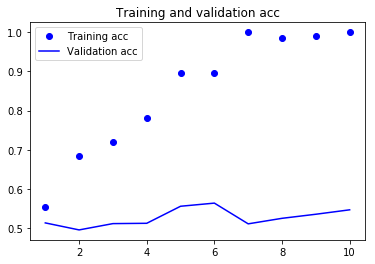

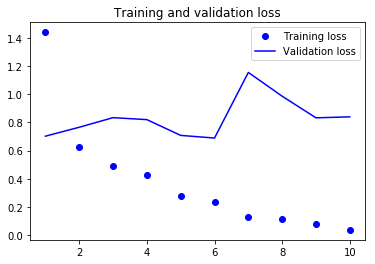

In [212]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation acc")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 6) 사전 훈련된 단어 임베딩 사용하지 않고 같은 모델 훈련하기

In [213]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_15 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [214]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 5ms/step - loss: 0.6927 - acc: 0.5300 - val_loss: 0.6943 - val_acc: 0.5143
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.5044 - acc: 0.9650 - val_loss: 0.7000 - val_acc: 0.5186
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2900 - acc: 0.9850 - val_loss: 0.6929 - val_acc: 0.5301
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1276 - acc: 1.0000 - val_loss: 0.7044 - val_acc: 0.5326
Epoch 5/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0596 - acc: 1.0000 - val_loss: 0.7080 - val_acc: 0.5296
Epoch 6/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0306 - acc: 1.0000 - val_loss: 0.7206 - val_acc: 0.5331
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0167 - acc: 1.0000 - val_loss: 0.7141 - val_acc: 0.5304
Epoch 8/10
200/200 [========

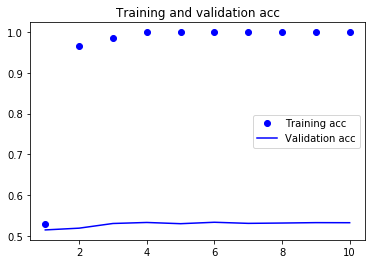

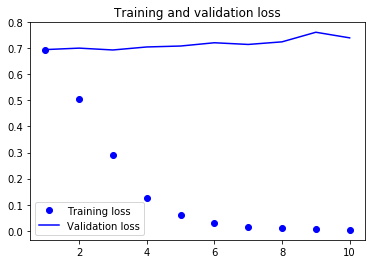

In [215]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation acc")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- 이 예제에서는 사전 훈련된 단어 임베딩을 사용하는 것이 임베딩을 함께 훈련하는 것보다 낫습니다. 훈련 샘플의 수를 늘리면 금세 상황 바뀐다.

### 7) 데이터 증가 - 사전 훈련

In [216]:
training_samples = 2000
validation_samples = 10000

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

x_train.shape, x_val.shape

((2000, 100), (10000, 100))

In [217]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_16 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 320,065
Non-trainable params: 1,000,000
_________________________________________________________________


In [218]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 2000 samples, validate on 10000 samples
Epoch 1/10
2000/2000 [==============================] - 2s 820us/step - loss: 0.7595 - acc: 0.5135 - val_loss: 0.6927 - val_acc: 0.5170
Epoch 2/10
2000/2000 [==============================] - 1s 440us/step - loss: 0.6804 - acc: 0.5625 - val_loss: 0.6754 - val_acc: 0.5855
Epoch 3/10
2000/2000 [==============================] - 1s 377us/step - loss: 0.6360 - acc: 0.6460 - val_loss: 0.6449 - val_acc: 0.6267
Epoch 4/10
2000/2000 [==============================] - 1s 397us/step - loss: 0.5109 - acc: 0.7485 - val_loss: 0.9757 - val_acc: 0.5085
Epoch 5/10
2000/2000 [==============================] - 1s 465us/step - loss: 0.4057 - acc: 0.8105 - val_loss: 0.6363 - val_acc: 0.6484
Epoch 6/10
2000/2000 [==============================] - 1s 438us/step - loss: 0.3370 - acc: 0.8560 - val_loss: 0.6766 - val_acc: 0.6581
Epoch 7/10
2000/2000 [==============================] - 1s 413us/step - loss: 0.2664 - acc: 0.9050 - val_loss: 0.7448 - val_acc: 0.6442

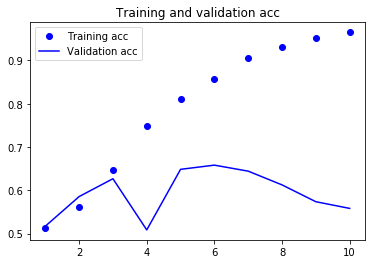

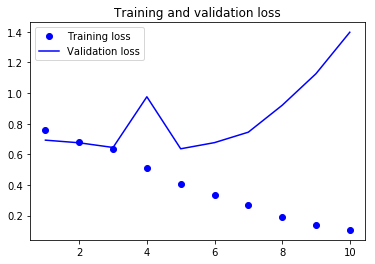

In [219]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation acc")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 데이터 증가 - 사전 훈련 없이

In [224]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#model.layers[0].set_weights([embedding_matrix])
#model.layers[0].trainable = False

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_19 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_30 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [225]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Train on 2000 samples, validate on 10000 samples
Epoch 1/10
2000/2000 [==============================] - 2s 850us/step - loss: 0.6852 - acc: 0.5675 - val_loss: 0.6607 - val_acc: 0.6514
Epoch 2/10
2000/2000 [==============================] - 1s 536us/step - loss: 0.3360 - acc: 0.9560 - val_loss: 0.5465 - val_acc: 0.7214
Epoch 3/10
2000/2000 [==============================] - 1s 634us/step - loss: 0.0495 - acc: 0.9980 - val_loss: 0.5418 - val_acc: 0.7342
Epoch 4/10
2000/2000 [==============================] - 1s 698us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.5664 - val_acc: 0.7444
Epoch 5/10
2000/2000 [==============================] - 1s 553us/step - loss: 3.5250e-04 - acc: 1.0000 - val_loss: 0.6153 - val_acc: 0.7508
Epoch 6/10
2000/2000 [==============================] - 1s 440us/step - loss: 2.9380e-05 - acc: 1.0000 - val_loss: 0.6901 - val_acc: 0.7476
Epoch 7/10
2000/2000 [==============================] - 1s 530us/step - loss: 2.0505e-06 - acc: 1.0000 - val_loss: 0.7379 - val

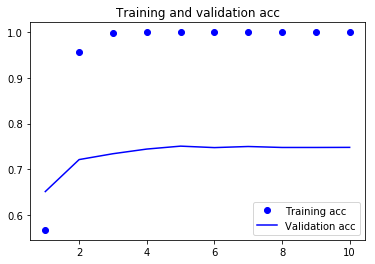

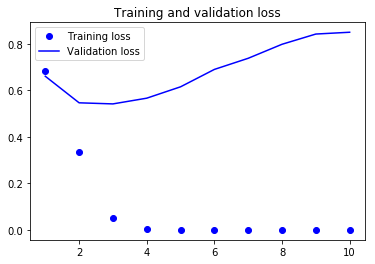

In [226]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation acc")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- 훈련 샘플을 늘리니 사전에 훈련된 weight 사용하지 않는 것이 더 결과가 좋다.

### 9) 테스트

In [227]:
import os

imdb_dir = './datasets/aclImdb'
train_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [229]:
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [230]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 82us/step


[1.371193352265954, 0.5622]

## 4) 정리

- 원본 텍스트를 신경망이 처리할 수 있는 형태로 변환한다.
- 케라스 모델에 Embedding 층을 추가하여 어떤 작업에 특화된 토큰 임베딩을 학습한다.
- 데이터가 부족한 자연어 처리 문제에서 사전 훈련된 단어 임베딩을 사용하여 성능 향상을 꾀한다.